## KPMG Data Analytics Internship Part 2: EDA and Modeling

In [71]:
#Importing Libraries
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from datetime import date, datetime, timedelta

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### 1.Importing the dataset

In [72]:
t3m=pd.read_csv('3_month_transaction.csv', parse_dates=['transaction_date', 'product_first_sold_date', 'DOB'])

In [73]:
#Choosing neccessary columns
t3m=t3m[['customer_id', 'first_name', 'last_name', 'gender',
       'transaction_id', 'product_id', 'transaction_date', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'address', 'postcode', 'state',
       'property_valuation', 'past_3_years_bike_related_purchases',
       'wealth_segment', 'deceased_indicator', 'owns_car', 'DOB', 'tenure']]

In [74]:
# sorting values by transaction_date
t3m.sort_values(by='transaction_date', inplace=True)

In [75]:
t3m.reset_index(inplace=True, drop=True)

In [76]:
t3m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4871 entries, 0 to 4870
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4871 non-null   int64         
 1   first_name                           4871 non-null   object        
 2   last_name                            4871 non-null   object        
 3   gender                               4871 non-null   object        
 4   transaction_id                       4871 non-null   int64         
 5   product_id                           4871 non-null   int64         
 6   transaction_date                     4871 non-null   datetime64[ns]
 7   online_order                         4871 non-null   float64       
 8   order_status                         4871 non-null   object        
 9   brand                                4871 non-null   object        
 10  product_line

In [77]:
t3m.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,4871.0,1745.829193,1002.263890,1.00,891.00,1728.00,2619.50,3499.00
transaction_id,4871.0,9982.520838,5832.431702,3.00,4949.00,9925.00,15071.00,19997.00
product_id,4871.0,46.078013,30.613093,0.00,19.00,45.00,72.00,100.00
online_order,4871.0,0.506877,0.500004,0.00,0.00,1.00,1.00,1.00
list_price,4871.0,1097.045568,577.073209,12.01,575.27,1163.89,1555.58,2091.47
standard_cost,4871.0,543.310821,399.001522,7.21,215.14,459.71,778.69,1759.85
postcode,4871.0,2986.846849,845.841742,2000.00,2206.00,2767.00,3752.00,4883.00
property_valuation,4871.0,7.461712,2.825108,1.00,6.00,8.00,9.00,12.00
past_3_years_bike_related_purchases,4871.0,48.620612,28.823875,0.00,23.00,47.00,73.00,99.00
tenure,4871.0,10.674605,5.701422,1.00,6.00,11.00,16.00,22.00


In [78]:
t3m.head()

,customer_id,first_name,last_name,gender,transaction_id,product_id,transaction_date,online_order,order_status,brand,...,address,postcode,state,property_valuation,past_3_years_bike_related_purchases,wealth_segment,deceased_indicator,owns_car,DOB,tenure
0,1189,Mart,Bazoche,M,17327,31,2017-09-30,1.0,Approved,WeareA2B,...,651 Mesta Drive,3173.0,VIC,9.0,22.0,High Net Worth,N,Yes,1988-08-29,8.0
1,2903,Avery,Adamov,M,18969,69,2017-09-30,0.0,Approved,Giant Bicycles,...,493 Calypso Center,2170.0,NSW,8.0,47.0,Affluent Customer,N,Yes,1977-09-20,9.0
2,2015,Charyl,Sibson,F,6207,92,2017-09-30,1.0,Approved,WeareA2B,...,1 Bobwhite Circle,2230.0,NSW,9.0,6.0,Affluent Customer,N,No,1974-02-19,7.0
3,3230,Calida,Clardge,F,19842,89,2017-09-30,1.0,Approved,WeareA2B,...,864 Scoville Plaza,3029.0,VIC,5.0,31.0,Mass Customer,N,No,1970-02-14,12.0
4,824,Fleurette,Whardley,F,1835,44,2017-09-30,0.0,Approved,WeareA2B,...,09413 Holmberg Terrace,4127.0,QLD,3.0,97.0,Affluent Customer,N,Yes,1977-02-27,12.0


### 2. Basic EDA

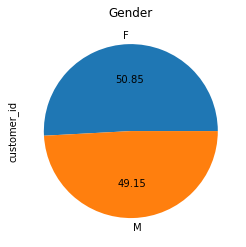

In [79]:
# Gender
t3m.groupby('gender').count()['customer_id'].plot(kind='pie',autopct='%.2f', title='Gender');

Almost 51% of all transactions were made by women and 49% were made men

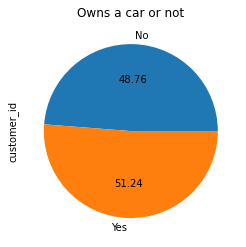

In [80]:
# Owns a car or not
t3m.groupby('owns_car').count()['customer_id'].plot(kind='pie',autopct='%.2f', title='Owns a car or not');

51% of all transactions made, were made by people who owns cars

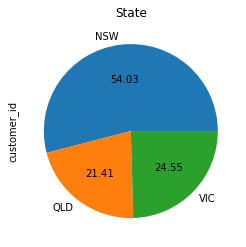

In [81]:
# state
t3m.groupby('state').count()['customer_id'].plot(kind='pie',autopct='%.2f', title='State');

54% of all transactions were made out of NSW, 24% of Victoria and 21% out of QLD

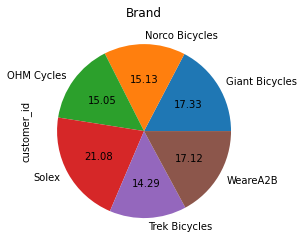

In [82]:
# brand
t3m.groupby('brand').count()['customer_id'].plot(kind='pie',autopct='%.2f', title='Brand');

Solex is the most purchased brand about 21% and Trek Bicycles is the least purchased brand

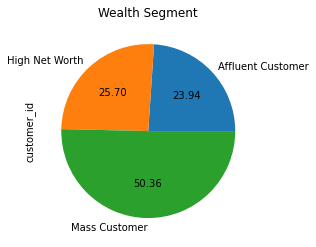

In [83]:
# Wealth segment
t3m.groupby('wealth_segment').count()['customer_id'].plot(kind='pie',autopct='%.2f', title='Wealth Segment');

50% of all transactions were made by Mass Customers, while High net worth customers purchased around 26% and the remaining 24% were made by Affluent Customers

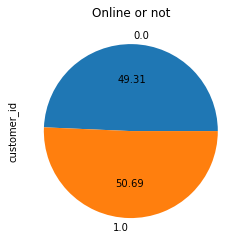

In [84]:
#Online or offline
t3m.groupby('online_order').count()['customer_id'].plot(kind='pie',autopct='%.2f', title='Online or not');

Around 51% of all transactions were made online

In [85]:
# A person with most transactions
t3m['customer_id'].value_counts().head(1).index
t3m[t3m['customer_id']==2476].head(1)[['first_name','last_name']]

,first_name,last_name
1256,Hal,Braddon


A person called Hal Braddon is the person with the most purchases about 8 in the last 3 month

In [86]:
# Number of orders that are more than 1
(100/len(t3m['customer_id'].value_counts()))*(sum(list(t3m['customer_id'].value_counts()>1)))

53.77250095748755

There are a lot of people **(almost 54%)** with more than 1 transaction which may indicate that there is some sort of customer retention

### 3. Cohort Analysis

#### 3.1 Cohort Matrix

In [17]:
t3m['transaction_month']=t3m['transaction_date'].dt.month

In [18]:
t3m['cohort_month']=t3m.groupby('customer_id')['transaction_month'].transform('min')

In [19]:
t3m['cohort_index']=t3m['transaction_month']-t3m['cohort_month']+1

In [20]:
cohort_data=t3m.groupby(['cohort_month','cohort_index'])['customer_id'].apply(pd.Series.nunique)
cohort_data=cohort_data.reset_index()
cohorts=cohort_data.pivot(index='cohort_month', columns='cohort_index', values='customer_id')
cohorts

cohort_index,1,2,3,4
cohort_month,,,,
9,43.0,13.0,15.0,10.0
10,1336.0,499.0,472.0,NaN
11,744.0,285.0,NaN,NaN
12,488.0,NaN,NaN,NaN


#### 3.2 Retention Matrix

In [21]:
cohorts_size=cohorts.iloc[:,0]
retention=cohorts.divide(cohorts_size, axis=0)
retentions=retention.round(3)*100
retentions

cohort_index,1,2,3,4
cohort_month,,,,
9,100.0,30.2,34.9,23.3
10,100.0,37.4,35.3,NaN
11,100.0,38.3,NaN,NaN
12,100.0,NaN,NaN,NaN


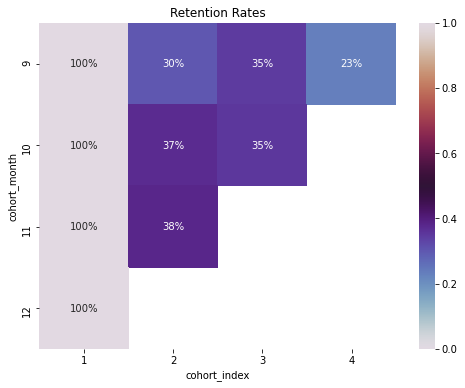

In [22]:
plt.figure(figsize=(8,6))
plt.title('Retention Rates')
sns.heatmap(data=retention, annot=True, fmt='.0%', cmap='twilight',vmin=0.0, vmax=1);

23% of customers who made their first purchased in september were still active in december, 35% of all customers who made their first purchases in october were still active in december, and 38% of customers who made their first purchases in november were still active in december

### 4. Customer Segmentation (RFM Metrics)

In [23]:
# In this dataset we were not provided the unit price of each product, in that case we can assume that the unit price is the same 
## for all the brands
t3m['price']=1000

In [24]:
# creating a date to measure recency
date_=t3m['transaction_date'].max()+timedelta(days=1)

In [25]:
rfm_data=t3m.groupby(['customer_id']).agg({'transaction_date': lambda x: (date_-x.max()).days, 'transaction_id':'count', 'price':'sum'})

In [26]:
rfm_data['transaction_date']=rfm_data['transaction_date'].astype(int)

In [27]:
rfm_data.rename(columns={'transaction_date':'Recency', 'transaction_id':'Frequency', 'price':'MonetaryValue'}, inplace=True)

In [28]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2611 entries, 1 to 3499
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Recency        2611 non-null   int32
 1   Frequency      2611 non-null   int64
 2   MonetaryValue  2611 non-null   int64
dtypes: int32(1), int64(2)
memory usage: 71.4 KB


In [29]:
# creating quantiles
quantiles=rfm_data.quantile(q=[0.25,0.5,0.75])
quantiles=quantiles.to_dict()

In [30]:
#defining function 1
#The lower the recency the better the customer
def recency(x,p,d):
    if x <=d[p][0.25]:
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x <=d[p][0.75]:
        return 2
    else:
        return 1

In [31]:
#defining function 2
#the bigger the frequency and the monetary value the better customer
def freq_monet_(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4

In [32]:
rfm_data['R']=rfm_data['Recency'].apply(recency, args=('Recency', quantiles,))
rfm_data['F']=rfm_data['Frequency'].apply(freq_monet_,args=('Frequency', quantiles,))
rfm_data['M']=rfm_data['MonetaryValue'].apply(freq_monet_,args=('MonetaryValue', quantiles,))

In [33]:
rfm_data.head()

,Recency,Frequency,MonetaryValue,R,F,M
customer_id,,,,,,
1,8,3,3000,4,4,4
5,17,1,1000,3,1,1
6,65,1,1000,1,1,1
8,23,3,3000,3,4,4
9,79,2,2000,1,2,2


In [34]:
#defining function 3
def concatenate_rfm(x):
    return str(x['R'])+str(x['F'])+str(x['M'])

In [35]:
rfm_data['RFM_segment']=rfm_data.apply(concatenate_rfm,axis=1)
rfm_data['RFM_Score']=rfm_data[['R','F','M']].sum(axis=1)
rfm_data.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_Score
customer_id,,,,,,,,
1,8,3,3000,4,4,4,444,12
5,17,1,1000,3,1,1,311,5
6,65,1,1000,1,1,1,111,3
8,23,3,3000,3,4,4,344,11
9,79,2,2000,1,2,2,122,5


In [36]:
# Largest RFM Segments
rfm_data.groupby('RFM_segment').size().sort_values(ascending=False)

RFM_segment
111    489
211    303
444    256
311    242
222    236
422    226
322    220
344    192
411    173
122    138
244    111
144     25
dtype: int64

we can see that the highest and lowest rated(444 and 111) are among the largest segments

In [37]:
#customers with high rfm segment
rfm_data[rfm_data['RFM_segment']=='444'].head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_Score
customer_id,,,,,,,,
1,8,3,3000,4,4,4,444,12
17,1,3,3000,4,4,4,444,12
21,7,3,3000,4,4,4,444,12
25,6,3,3000,4,4,4,444,12
37,8,3,3000,4,4,4,444,12


In [38]:
#list of customer with high rated rfm segment
list_best_rated_customers=list(rfm_data[rfm_data['RFM_segment']=='444'].index)

In [39]:
# Summary Metrics per RFM Score
rfm_score_table=rfm_data.groupby('RFM_Score').agg({'Recency':'mean','Frequency':'mean','MonetaryValue':['mean','count']}).round(1)
rfm_score_table.head()

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3            74.9       1.0        1000.0   489
4            44.4       1.0        1000.0   303
5            39.3       1.4        1363.2   380
6            28.9       1.6        1577.0   409
7            22.6       2.0        2000.0   220

In [40]:
#Segmenting customers into Gold, Silver and Bronze segments
def segments_(data):
    if data['RFM_Score']>=9:
        return 'Gold'
    elif (data['RFM_Score']>=5) and (data['RFM_Score']<9):
        return 'Silver'
    else:
        return 'Bronze'

In [41]:
rfm_data['Segments']=rfm_data.apply(segments_,axis=1)

In [87]:
segment_table=rfm_data.groupby('Segments').agg({'Recency':'mean','Frequency':'mean','MonetaryValue':['mean','count']})
segment_table

Recency Frequency MonetaryValue      
               mean      mean          mean count
Segments                                         
Bronze    63.210859  1.000000   1000.000000   792
Gold      21.354452  3.465753   3465.753425   584
Silver    27.090688  1.663968   1663.967611  1235

In [90]:
#customer with gold segment
customers_gold=list(rfm_data[rfm_data['Segments']=='Gold'].index)

### 5. Data Pre_processing

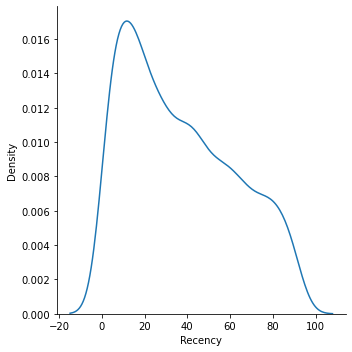

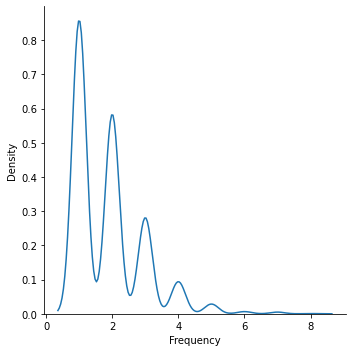

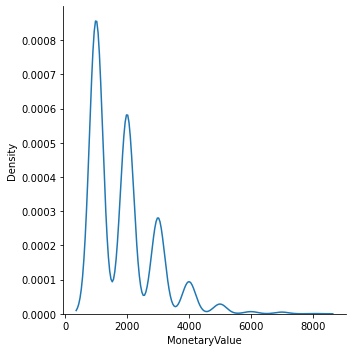

In [91]:
# checking skewness
sns.displot(rfm_data['Recency'], kind='kde')
sns.displot(rfm_data['Frequency'], kind='kde')
sns.displot(rfm_data['MonetaryValue'], kind='kde');

In [92]:
#unskewing the data
rfm_table=pd.DataFrame()
rfm_table['Recency']=stats.boxcox(rfm_data['Recency'])[0]
rfm_table['Frequency']=stats.boxcox(rfm_data['Frequency'])[0]
rfm_table['MonetaryValue']=pd.Series(np.cbrt(rfm_data['MonetaryValue'])).values
rfm_table.head()

,Recency,Frequency,MonetaryValue
0,3.510944,0.796595,14.422496
1,5.893203,0.000000,10.000000
2,12.879011,0.000000,10.000000
3,7.110045,0.796595,14.422496
4,14.309788,0.563380,12.599210


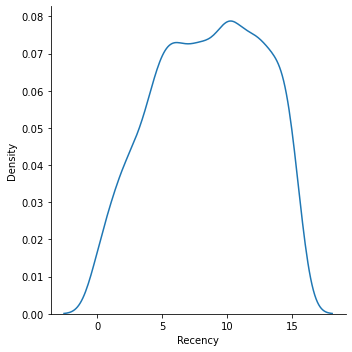

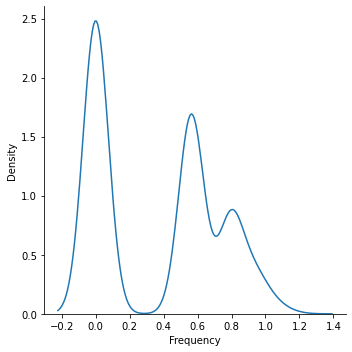

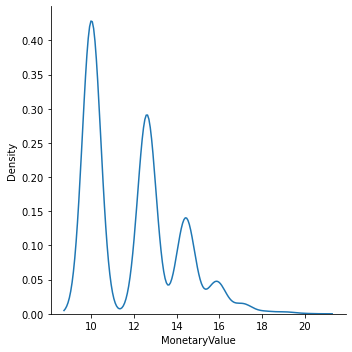

In [93]:
sns.displot(rfm_table['Recency'], kind='kde')
sns.displot(rfm_table['Frequency'], kind='kde')
sns.displot(rfm_table['MonetaryValue'], kind='kde');

In [94]:
#Standardizing the data
scaler=StandardScaler()
scaler.fit(rfm_table)
rfm_table_normalized=scaler.transform(rfm_table)
print ('mean: ', rfm_table_normalized.mean(axis=0).round(2))
print( 'std: ', rfm_table_normalized.std(axis=0).round(2))

mean:  [-0. -0. -0.]
std:  [1. 1. 1.]


In [95]:
pd.DataFrame(rfm_table_normalized).head()

,0,1,2
0,-1.222441,1.198293,1.194064
1,-0.640824,-1.025021,-0.939614
2,1.064728,-1.025021,-0.939614
3,-0.343738,1.198293,1.194064
4,1.414045,0.547387,0.314402


### 6.Modeling

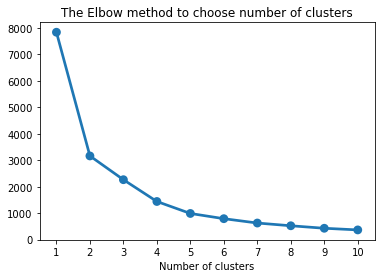

In [97]:
# Choosing the number of clusters using the elbow method
## By looking at the graph below, I think the best k=2 i choose this because
### the client wants to know at 1000 important customers
inertia={}
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_table_normalized)
    inertia[k]=kmeans.inertia_
plt.title('The Elbow method to choose number of clusters')
plt.xlabel('Number of clusters')
sns.pointplot(x=list(inertia.keys()), y=list(inertia.values()))
plt.show()

In [111]:
# Modeling using 3 clusters
model=KMeans(n_clusters=3, random_state=42)
model.fit(rfm_table_normalized)
model_labels=model.labels_
model_labels

array([2, 1, 1, ..., 2, 1, 1])

In [99]:
rfm_final=rfm_data[['Recency','Frequency','MonetaryValue']]
rfm_final['Clusters']=model_labels
rfm_final.head()

,Recency,Frequency,MonetaryValue,Clusters
customer_id,,,,
1,8,3,3000,2
5,17,1,1000,1
6,65,1,1000,1
8,23,3,3000,2
9,79,2,2000,0


In [100]:
customer_clusters=rfm_final.groupby('Clusters').agg({'Recency':'mean','Frequency':'mean','MonetaryValue':['mean','count']}).round(1)
customer_clusters

Recency Frequency MonetaryValue      
            mean      mean          mean count
Clusters                                      
0           45.0       2.2        2219.7   660
1           47.2       1.0        1000.0  1207
2           12.5       3.0        2955.6   744

In [101]:
#The Snake Plot
##Creating the data
datar=pd.DataFrame(rfm_table_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'], index=rfm_data.index)
datar['clusters']=rfm_final['Clusters']

In [102]:
## Melting the data
datar_melted=pd.melt(datar.reset_index(), id_vars=['customer_id','clusters'], value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                    var_name='Attribute',
                    value_name='Value')

In [103]:
datar_melted.head()

,customer_id,clusters,Attribute,Value
0,1,2,Recency,-1.222441
1,5,1,Recency,-0.640824
2,6,1,Recency,1.064728
3,8,2,Recency,-0.343738
4,9,0,Recency,1.414045


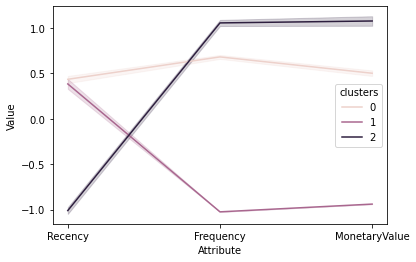

In [104]:
## The line plot
sns.lineplot(data=datar_melted,x='Attribute', y='Value',hue='clusters');

In this plot we can see group 2 buys more frequent,spends more and has purchased recently

In [113]:
#modeling using 2 groups
model1=KMeans(n_clusters=2, random_state=42)
model1.fit(rfm_table_normalized)
model_labels1=model1.labels_
model_labels1

array([0, 1, 1, ..., 0, 1, 1])

In [116]:
rfm_final1=rfm_data[['Recency','Frequency','MonetaryValue']]
rfm_final1['Clusters']=model_labels1
rfm_final1.head()

,Recency,Frequency,MonetaryValue,Clusters
customer_id,,,,
1,8,3,3000,0
5,17,1,1000,1
6,65,1,1000,1
8,23,3,3000,0
9,79,2,2000,0


In [117]:
customer_clusters1=rfm_final1.groupby('Clusters').agg({'Recency':'mean','Frequency':'mean','MonetaryValue':['mean','count']}).round(1)
customer_clusters1

Recency Frequency MonetaryValue      
            mean      mean          mean count
Clusters                                      
0           27.8       2.6        2609.7  1404
1           47.2       1.0        1000.0  1207

In [118]:
#The Snake Plot
##Creating the data
datar1=pd.DataFrame(rfm_table_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'], index=rfm_data.index)
datar1['clusters']=rfm_final1['Clusters']

In [119]:
## Melting the data
datar_melted1=pd.melt(datar1.reset_index(), id_vars=['customer_id','clusters'], value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                    var_name='Attribute',
                    value_name='Value')

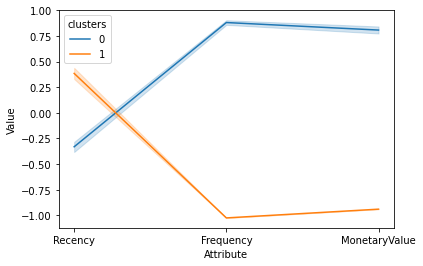

In [121]:
sns.lineplot(data=datar_melted1,x='Attribute', y='Value',hue='clusters');

In this plot we can see group 0 buys more frequent,spends more and has purchased recently